<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных-и-параметров" data-toc-modified-id="Изучение-данных-и-параметров-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных и параметров</a></span></li><li><span><a href="#Изучение-параметров" data-toc-modified-id="Изучение-параметров-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение параметров</a></span></li><li><span><a href="#Корректность-эффективности-обогащения" data-toc-modified-id="Корректность-эффективности-обогащения-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Корректность эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков-в-тренировочном-датасете" data-toc-modified-id="Анализ-признаков-в-тренировочном-датасете-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Анализ признаков в тренировочном датасете</a></span></li><li><span><a href="#Первичная-предобработка-данных" data-toc-modified-id="Первичная-предобработка-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Первичная предобработка данных</a></span></li><li><span><a href="#Вывод-подготовительного-этапа" data-toc-modified-id="Вывод-подготовительного-этапа-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод подготовительного этапа</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-анализу" data-toc-modified-id="Вывод-по-анализу-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод по анализу</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#Модель-DecisionTreeRegressor" data-toc-modified-id="Модель-DecisionTreeRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель DecisionTreeRegressor</a></span></li><li><span><a href="#Модель-RandomForestRegressor" data-toc-modified-id="Модель-RandomForestRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель RandomForestRegressor</a></span></li><li><span><a href="#Тестовая-выборка" data-toc-modified-id="Тестовая-выборка-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Тестовая выборка</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Наша задача - подготовить прототип модели машинного обучения, которая предсказывает коэффициень восстановления золота из золотосодержащей руди.

Используем следующие данные: 
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

В основном для решения использовали следующие библиотеки:
*pandas*, *matplotlib* и *sklearn.*

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import (
    train_test_split,
    validation_curve,
    learning_curve,
    cross_val_score,
)
from sklearn.dummy import DummyRegressor
from numpy.random import RandomState
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import make_pipeline

### Изучение данных и параметров

In [2]:
#Прочитаем данные
try:
    data_train = pd.read_csv("/datasets/gold_recovery_train_new.csv")
    data_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")
    data_full = pd.read_csv("/datasets/gold_recovery_full_new.csv")
except:
    display('не удалось прочитать данные')

Выведем первичную информауцию о датасетах

In [3]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

- В тестовом датасете имеем **5290** объекта, **53** признака;
- Все признаки в формате *float64*, кроме даты. Дату потребуется перевести в тип datetime;
- Имеются пропуски в некоторых столбцах(пример `primary_cleaner.input.sulfate`)

In [5]:
data_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


- В тренировочном датасете **14149** объектов с **87** признаками;
- Все типы данных float64,кроме даты
- Имеются пропуски, пример `final.output.concentrate_sol`

In [7]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


- В полном датасете **19439** объектов с **87** признаками;
- Все типы данных float64, кроме даты
- Имеются пропуски, пример `primary_cleaner.input.depressant` - 19402 полных ячеек
- Тренировочные объекты + тестовые = полные

    `14149 + 5290 = 19439`

Проверим на дубликаты

In [9]:
data_train.duplicated().sum()

0

In [10]:
data_test.duplicated().sum()

0

In [11]:
data_full.duplicated().sum()

0

Полных дубликатов по датусету нет

**Промежуточный вывод** :
- Всего 14149 данных для обучения, и 5290 данных для теста.
- Количество данных в датасетах корректное 14149 + 5290 = 19439 (исходный full датасет)
- Признаков в тестовой выборке значительно меньше - 53 против 87. Требуется подробно изучить параметры объектов
- Имеются пропуски в датасетах

### Изучение параметров

Наименование признаков имеют следующую структуру:  

`[этап].[тип_параметра].[название_параметра]`  

Создадим объект DataFrame из колонок, затем группируем структуре

In [12]:
df_columns = (
    data_full.columns
    .rename("full_parameter_name")
    .to_frame()
    .reset_index(drop=True)
)
# Убираем дату из первой строки
df_columns = df_columns.loc[1:]

# Разбиваем full_parameter_name на три новых столбца
df_columns = pd.concat(
    [
     df_columns,
     df_columns["full_parameter_name"]
     .str.split(".", expand=True)
     .rename(columns={0: "stage", 1: "parameter_type", 2: "parameter_name"}),
    ],
    axis=1,
)

df_columns.head()

,full_parameter_name,stage,parameter_type,parameter_name
1,final.output.concentrate_ag,final,output,concentrate_ag
2,final.output.concentrate_pb,final,output,concentrate_pb
3,final.output.concentrate_sol,final,output,concentrate_sol
4,final.output.concentrate_au,final,output,concentrate_au
5,final.output.recovery,final,output,recovery


In [13]:
df_columns.parameter_type.unique()

array(['output', 'input', 'state', 'calculation'], dtype=object)

Имеются следующие этапы:
- input — параметры сырья
- output — параметры продукта (в т.ч. целевой признак recovery)
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

На каждом параметре рассмотрим типы этапов:

In [14]:
df_columns.pivot_table(
    index="parameter_type",
    columns="stage",
    values="parameter_name",
    aggfunc="count",
)

stage,final,primary_cleaner,rougher,secondary_cleaner
parameter_type,,,,
calculation,NaN,NaN,4.0,NaN
input,NaN,4.0,10.0,NaN
output,9.0,8.0,9.0,4.0
state,NaN,8.0,12.0,18.0


- На финальном обогащении final мы имеем только output(9) параметры
- Все преобразования уже прошли на втором этапе очистки secondary_cleaner
- Здесь мы получаем продукт secondary_cleaner.output после удаления отвальных хвостов (остатки продукта с низкой концентрацией ценных металлов)
- На этапе флотации имеем 10 параметров input, а а также тольк она этом этапе расчетные характеристики calculation

In [15]:
df_columns['parameter_type'].value_counts()

state          38
output         30
input          14
calculation     4
Name: parameter_type, dtype: int64

In [16]:
def print_parameters_by_type(parameters_df, type_name):
    #Выводит список параметров заданного типа для каждого этапа обработки нефти
    
    display(
        parameters_df.query("parameter_type == @type_name").pivot_table(
            index="parameter_name",
            columns="stage",
            values="parameter_type",
            aggfunc="count",
        )
    )

Посмотрим параметры output

In [17]:
print_parameters_by_type(df_columns, "output")

stage,final,primary_cleaner,rougher,secondary_cleaner
parameter_name,,,,
concentrate_ag,1.0,1.0,1.0,NaN
concentrate_au,1.0,1.0,1.0,NaN
concentrate_pb,1.0,1.0,1.0,NaN
concentrate_sol,1.0,1.0,1.0,NaN
recovery,1.0,NaN,1.0,NaN
tail_ag,1.0,1.0,1.0,1.0
tail_au,1.0,1.0,1.0,1.0
tail_pb,1.0,1.0,1.0,1.0
tail_sol,1.0,1.0,1.0,1.0


Основные составляющие концентрата и хвостов:
- ag - серебро
- au - золото
- pb - свинец
- sol - коллоидный раствор 

Тип состояния
- concentrate - концентрат после обработки
- tail - хвосты обработки  

Значение recovery по условиям проекта складывается из `concentrate_au` и `tail_au`, присутствует только в этапа final и rougher:

- требуется проверить корректность recovery
- все параметры продукта ('output') требуется скрыть для обучения модели, так как косвенно относятся к целевому признаку

Параметры сырья:

In [18]:
print_parameters_by_type(df_columns, "input")

stage,primary_cleaner,rougher
parameter_name,,
depressant,1.0,NaN
feed_ag,NaN,1.0
feed_au,NaN,1.0
feed_pb,NaN,1.0
feed_rate,NaN,1.0
feed_size,1.0,1.0
feed_sol,NaN,1.0
floatbank10_sulfate,NaN,1.0
floatbank10_xanthate,NaN,1.0


1. Параметры сырья есть только на двух начальных стадиях:
- rougher
- primary_cleaner
2. На входе в процесс флотации мы имеем:

- исходную смесь будущего продукта (au, ag, pb, sol)
- feed size — размер гранул сырья
- feed rate скорость подачи
- набор флотационных реагентов для отделения полезных минералов от минералов пустой породы Xanthate и Sulphate

3. На этапе первичной очистки у нас измерены только:

- feed size — размер гранул сырья
- Xanthate, Sulphate, Depressant - флотационные реагенты
4. 13 параметров сырья дают нам базовый набор признаков для предсказания эффективности обогащения золота.

Параметры состояния:

In [19]:
print_parameters_by_type(df_columns, 'state')

stage,primary_cleaner,rougher,secondary_cleaner
parameter_name,,,
floatbank10_a_air,NaN,1.0,NaN
floatbank10_a_level,NaN,1.0,NaN
floatbank10_b_air,NaN,1.0,NaN
floatbank10_b_level,NaN,1.0,NaN
floatbank10_c_air,NaN,1.0,NaN
floatbank10_c_level,NaN,1.0,NaN
floatbank10_d_air,NaN,1.0,NaN
floatbank10_d_level,NaN,1.0,NaN
floatbank10_e_air,NaN,1.0,NaN


Из 38 признаков фигурируют 2 признака:
- air amount — объём воздуха
- fluid levels — уровень жидкости  

Буквенные обосначения скорее всего обозначение оборудования.

In [20]:
print_parameters_by_type(df_columns, 'calculation')

stage,rougher
parameter_name,
au_pb_ratio,1
floatbank10_sulfate_to_au_feed,1
floatbank11_sulfate_to_au_feed,1
sulfate_to_au_concentrate,1


Расчётные характеристики на этапе rougher содержат данные об отношениях к золоту. Данную характеристику следует исключить из тренировочного датасета, т.к. косвенно относится к целевому признаку.

**Промежуточный вывод**:
- Разобрались в 84 параметрах
- в переменной data_train все параметры продукта (`output`) требуется скрыть для обучения модели, так как косвенно относятся к целевому признаку
- Расчётные характеристики содержат данные об отношениях к золоту. Данную характеристику следует исключить из тренировочного датасета, т.к. косвенно относится к целевому признаку.

### Корректность эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно:

- возьмем обучающую выборку data_train
- вычислим коэффициент для чернового концентрата
- оценим разницу между расчетами и rougher.output.recovery с помощью метрики MAE  

$Recovery\cdot 100 = \frac{ C \cdot (F-T) }{ F \cdot (C-T) }$

- C — доля золота в концентрате после флотации;
- F — доля золота в сырье до флотации;
- T — доля золота в отвальных хвастах после флотации.  

Результат сохраним в столбце rougher.output.recovery_calc

In [21]:
def calc_rougher_output_recovery(
    df, concentrate_au_col, feed_au_col, tail_au_col, output_col):
    #Функция для расчета эффективности обогащения
    
    df[output_col] = (
        (df[concentrate_au_col] * (df[feed_au_col] - df[tail_au_col]))
        / (df[feed_au_col] * (df[concentrate_au_col] - df[tail_au_col]))
        * 100
    )

    return df

In [22]:
# Создадим новый столбец "rougher.output.recovery_calc"
# Вычисляем коэффициент обогащения золота (черновой концентрат)
data_train = calc_rougher_output_recovery(
    data_train,
    "rougher.output.concentrate_au",
    "rougher.input.feed_au",
    "rougher.output.tail_au",
    "rougher.output.recovery_calc",
)

In [23]:
# Выводим исходный признак и рассчитанный через параметры коэффциент
data_train[["rougher.output.recovery_calc", "rougher.output.recovery"]].head()

,rougher.output.recovery_calc,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


Расчет MAE

In [24]:
print("{:.15f}".format(
    mean_absolute_error(
        data_train["rougher.output.recovery_calc"],
        data_train["rougher.output.recovery"])
    ))

0.000000000000010


**Промежуточный вывод**: коэффициент обогащения для процесса флотации рассчитан верно.

### Анализ признаков в тренировочном датасете

Выведем признаки, не входящие в тестовый датасет

In [25]:
missed_signs = set(data_train.columns) - set(data_test.columns)
missed_signs

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery_calc',
 'rougher.output.tail_ag',
 'rougher.out

**Промежуточный вывод**:  

- Отсутствуют все признаки `output` и `calculation`  
- В тестовой выборки в том числе отсутствуют целевые признаки rougher.output.recovery и final.output.recovery, которые будут нужны для расчета метрики качества. 
- В целом мы получаем набор из 52 признаков, которые можно использовать для предсказаний:
    - date - удаляем из признаков
    - 14 параметры сырья input на этапах флотации и первичной очистки
    - 38 параметров, характеризующие состояние на всех 3-х этапах обработки state

### Первичная предобработка данных

Преобразуем столбец с датой в дату.

In [26]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')

In [27]:
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')

In [28]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

In [29]:
data_train['date'].dtypes

dtype('<M8[ns]')

In [30]:
data_test['date'].dtypes

dtype('<M8[ns]')

In [31]:
data_full['date'].dtypes

dtype('<M8[ns]')

Изменили тип на datetime

Ранее отметили, что имеются пропуски, изучим поподробнее 

In [32]:
def view_nan_data(data):
    #Функция графического отображения пропусков
    ((data.isna().mean()*100) 
            .to_frame() 
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,19),y='space',legend=False,fontsize = 15,title='Процент пропусков'));

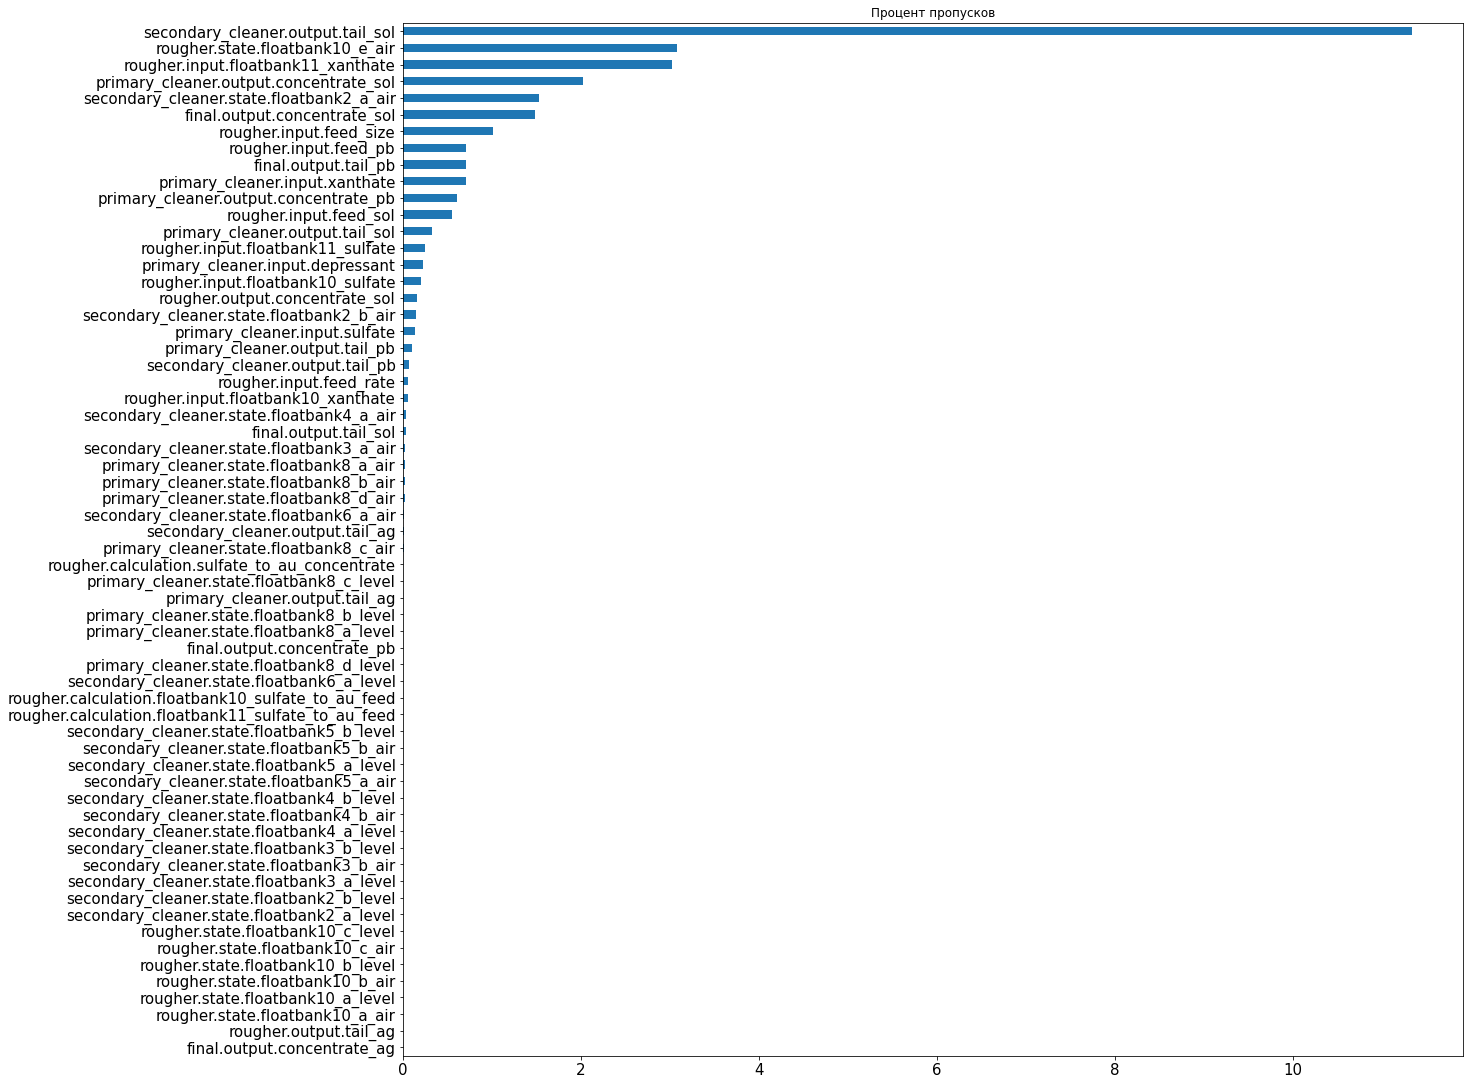

In [33]:
view_nan_data(data_train)

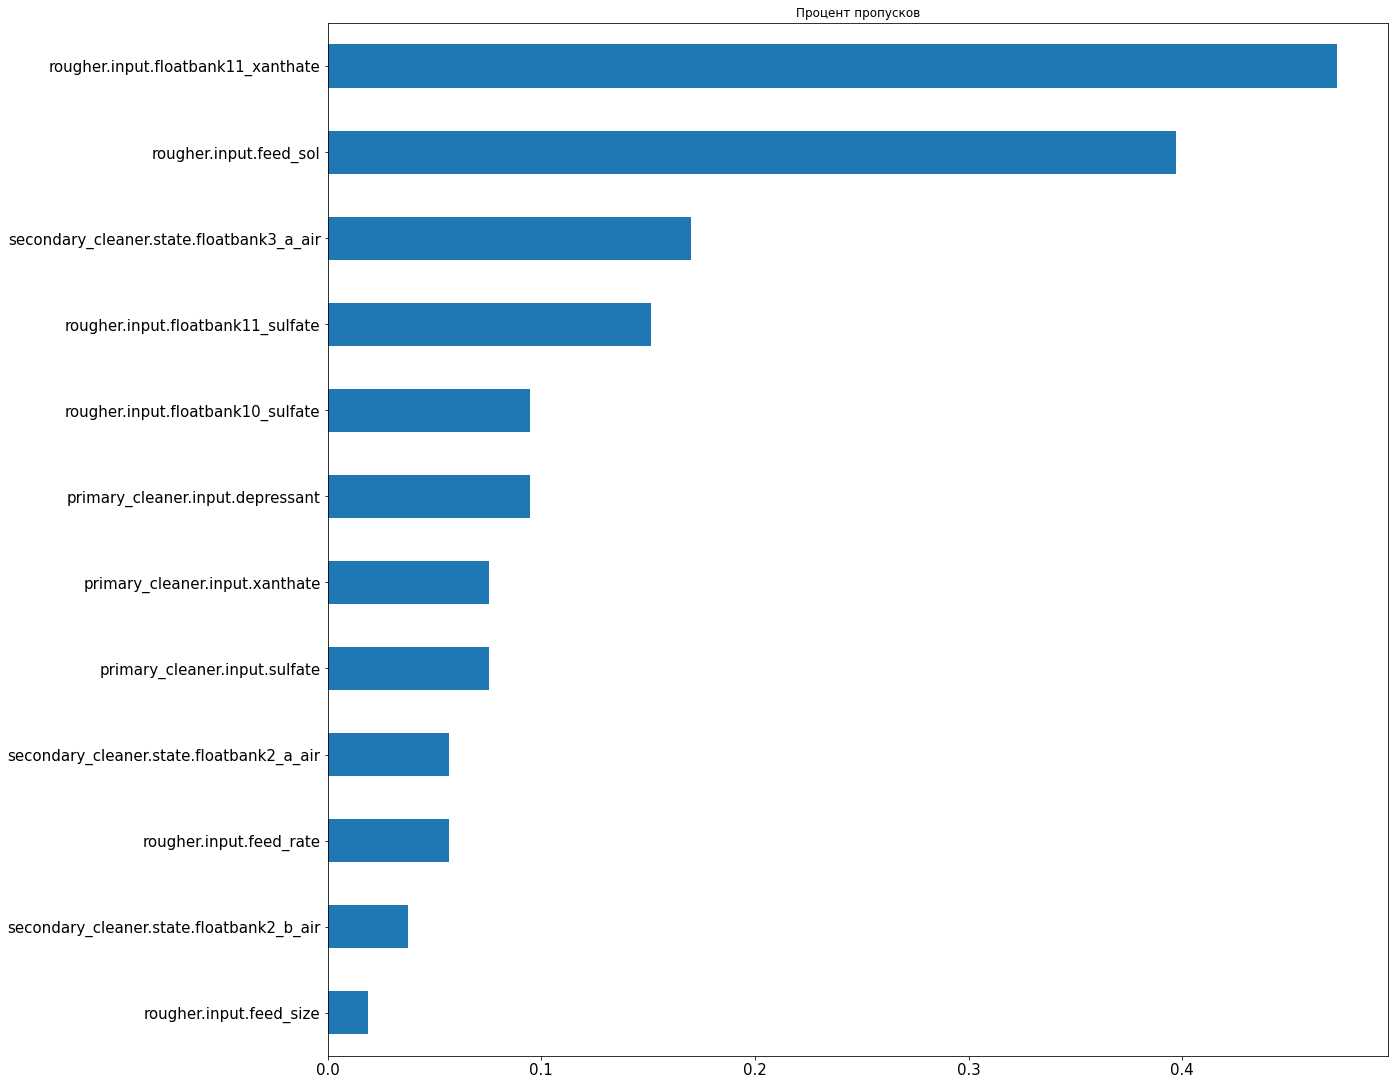

In [34]:
view_nan_data(data_test)

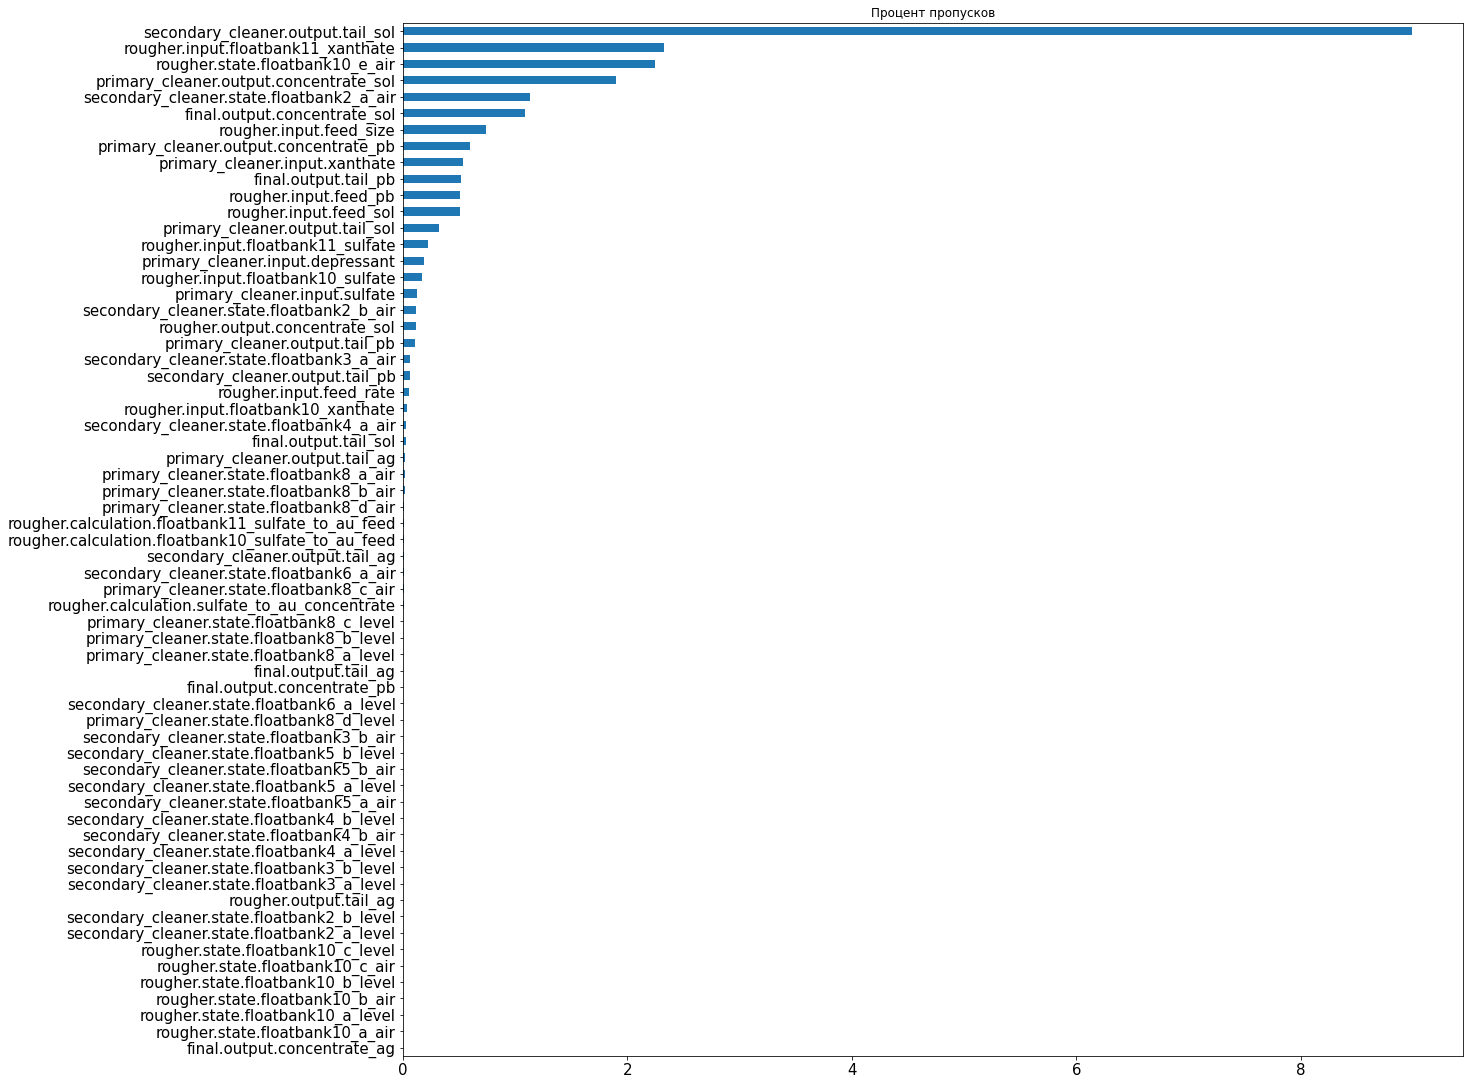

In [35]:
view_nan_data(data_full)

Выделяется хвост коллоидного раствора после вторичной обработки 8 %.  
В основном пропуски в районе 3% процентов, больше всего у состояния воздуха и добавления реагента.  

Данные величинвы статические, так как они используются в производстве и данные индексируются датой и временем получения информации (признак date), следовательно соседние по времени параметры часто похожи. 
Заполним пропуски предпоследним значением признака.

In [36]:
data_train = data_train.ffill(axis=0)
data_test = data_test.ffill(axis=0)
data_full = data_full.ffill(axis=0)

In [37]:
(data_train.isna()
 .sum().sum())

0

In [38]:
(data_test.isna()
 .sum().sum())

0

In [39]:
(data_full.isna()
 .sum().sum())

0

Возможно, тестовая и тренировочная выборка может пересекаться. Это прибавит долю верных ответов и модель получеится не совсем качественной. Проверим по дате, имеются ли пересечения у данных выборок

In [40]:
len(set(data_train['date'])-set(data_test['date']))

14149

Кол-во совпадает с кол-вом объектов в тренировочной выборке, значит пересекающих значений нет. 

В тестовой выборкe отсутствуют целевые признаки rougher.output.recovery и final.output.recovery, которые будут нужны для расчета метрики качества. Добавим их в тестовую выборку, используя метод merge, в качестве индексов используем колонку date (данные индексируются датой и временем получения информации)

In [41]:
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

Столбцы с датой теперь можно исключить из выборок, так как при обучении моделей не несут в себе дополнительной информации.

In [42]:
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

### Вывод подготовительного этапа

- Был изменен тип данных для колонки date с object на datetime. В остальных признаках типы данных соответствуют содержимому.
- Пропуски в датасетах (тренировочная выборки и тестовая) были заполнены значениями предшествующими по времени (интервал между объекатами исследования составляет 1 час, во время произвоства часто похожи, но не всегда, было решено заполнить соседними данными).
- Проверена правильность расчета эффективности обогащения. МАЕ равно предельно малому значению (отличие предсказаний от истинных значений).
- В целом мы получили набор из 52 признаков, которые можно использовать для предсказаний:
    - 14 параметры сырья input на этапах флотации и первичной очистки
    - 38 параметров, характеризующие состояние на всех 3-х этапах обработки state
- В тестовую выборку были добавлены целевые признаки (rougher.output.recovery, final.output.recovery), которые будут необходимы в дальнейшем для рассчета итоговой метрики качества.
- Колонка date была удалена как не информативна для дальнейшего обучения модели.

## Анализ данных

Изучим концентрацию металлов на различных этапах очистки. (нас интересует)

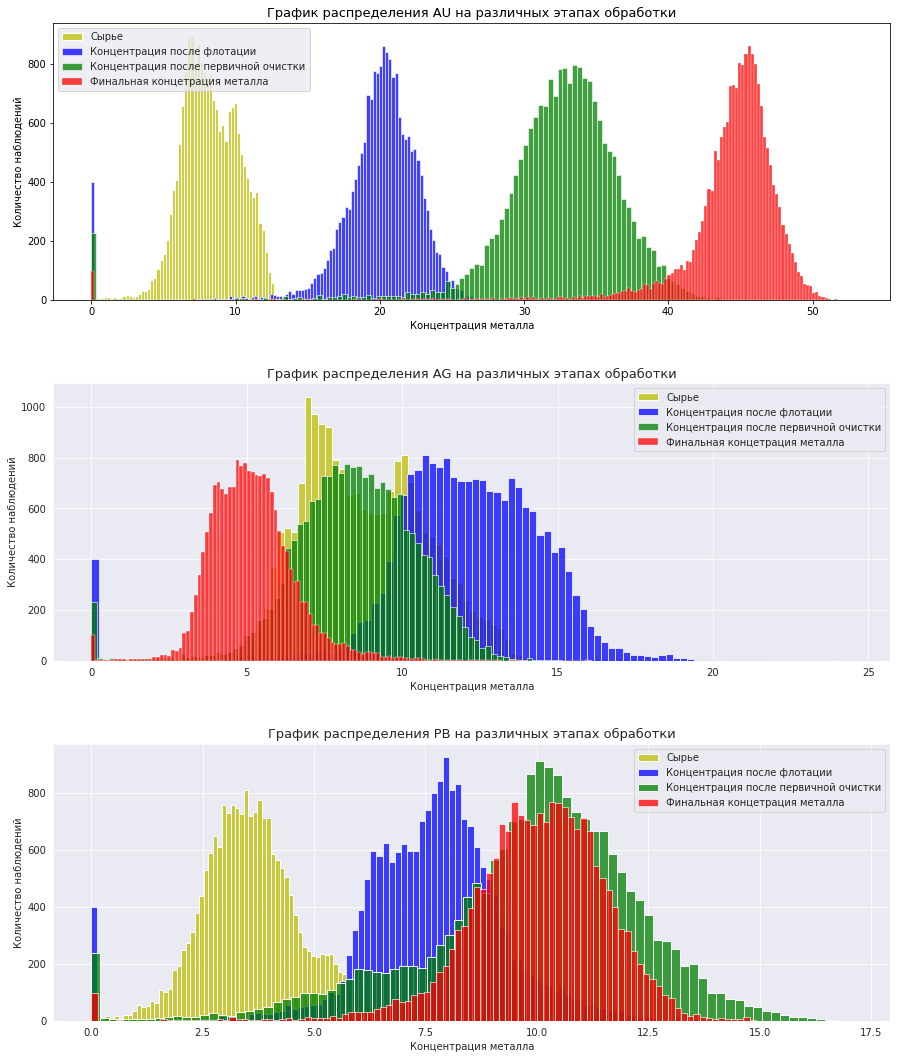

In [43]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
for metal in ['au', 'ag', 'pb']:
    position += 1
    plt.subplot(3, 1, position)
    plt.title(f'График распределения {str(metal).upper()} на различных этапах обработки', fontsize=13)
    sns.set_style('darkgrid')
    sns.histplot(data_full[f'rougher.input.feed_{metal}'],
                 color='y', label='Сырье', kde=False)
    sns.histplot(data_full[f'rougher.output.concentrate_{metal}'],
                 color='b', label='Концентрация после флотации', kde=False)
    sns.histplot(data_full[f'primary_cleaner.output.concentrate_{metal}'],
                 color='g', label='Концентрация после первичной очистки', kde=False)
    sns.histplot(data_full[f'final.output.concentrate_{metal}'],
                 color='r', label='Финальная концетрация металла',kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

- Доля золота на после каждого этапа очитски постепенно увеличивается
- Доля серебра увеличивается на этапе флотации, а затем постепенно уменьшается
- Доля свинца сначала увеличивается на этапе флотации и после первичной очитски, затем остатется примерно на одном уровне
- Также замечаем что присутствуют нулевые значения

Для финального и этапа флотации для суммарной концентрации веществ присутствуют аномалии ( значения в районе 0). Исключим данные параметры. Аномалии могут негативно повлиять на качество обучения модели.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

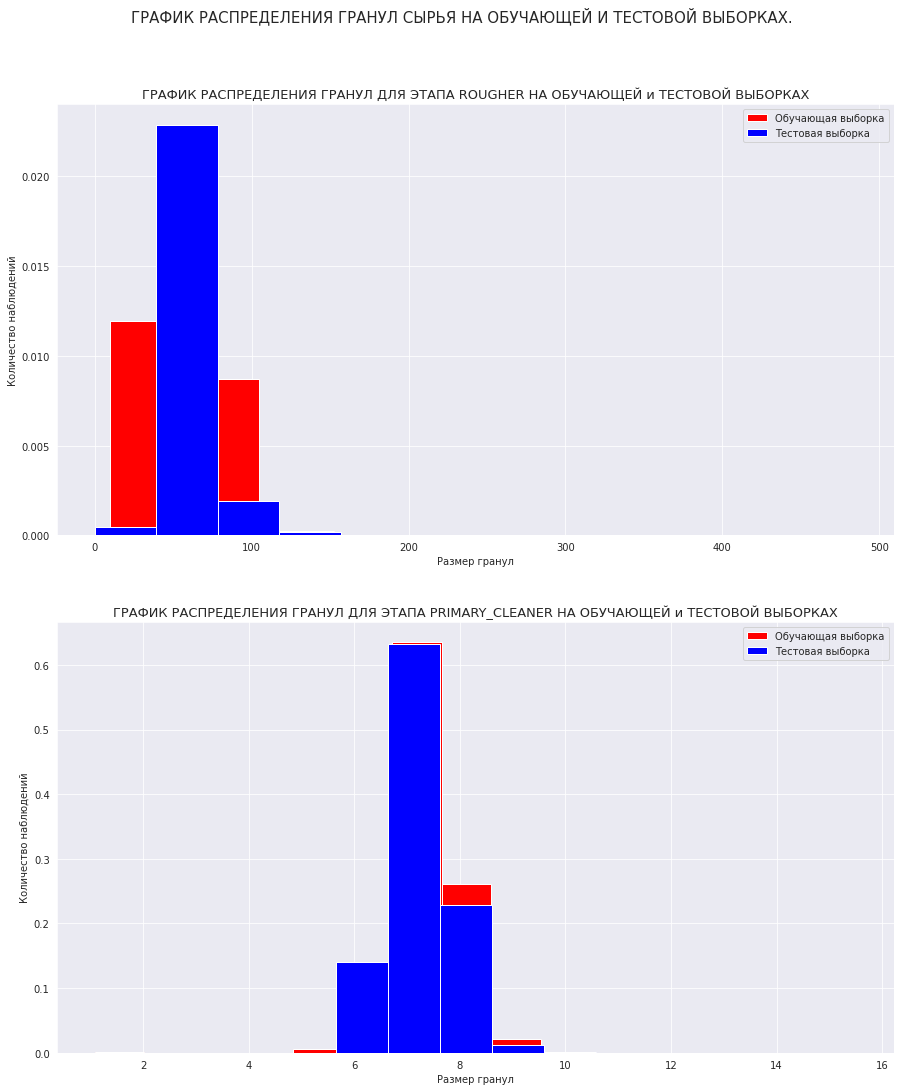

In [45]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.90, wspace=0.2, hspace=0.2)
plt.suptitle('ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ СЫРЬЯ НА ОБУЧАЮЩЕЙ И ТЕСТОВОЙ ВЫБОРКАХ.',\
             fontsize=15)
for stage in ['rougher', 'primary_cleaner']:
    position += 1
    plt.subplot(2, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ ДЛЯ ЭТАПА {str(stage).upper()} НА ОБУЧАЮЩЕЙ и ТЕСТОВОЙ ВЫБОРКАХ', fontsize=13)
    sns.set_style('darkgrid')
    plt.hist(data_train[f'{stage}.input.feed_size'],
             color='r', label='Обучающая выборка', density=True)
    plt.hist(data_test[f'{stage}.input.feed_size'],
             color='b', label='Тестовая выборка', density=True)
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

- Для этапа флотации распределение гранул находится примерно в одинаковом диапазоне, но для тренировочной выборки преобладают гранулы с размером ~ 50 , а для тестовой наоборот, ниже порога 50.
- Для этапа первичной очитски разспределение гранул для выборок находится в одном диапазоне, однако есть различия в количестве наблюдений. Так для тренировочной выборки количество наблюдений размера гранул больше, чем для тестовой.
- Следовательно,значимых различий между распределениями для выборок не наблюдается.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [48]:
sum_concentrate_of_rougher_input = 0
sum_concentrate_of_rougher_output = 0
sum_concentrate_of_primary_cleaner_output = 0
sum_concentrate_of_final_output = 0
for metal in ['au', 'ag', 'pb', 'sol']:
    sum_concentrate_of_rougher_input += data_full[f'rougher.input.feed_{metal}']
    sum_concentrate_of_rougher_output += data_full[f'rougher.output.concentrate_{metal}']
    sum_concentrate_of_primary_cleaner_output += data_full[f'primary_cleaner.output.concentrate_{metal}']
    sum_concentrate_of_final_output += data_full[f'final.output.concentrate_{metal}']

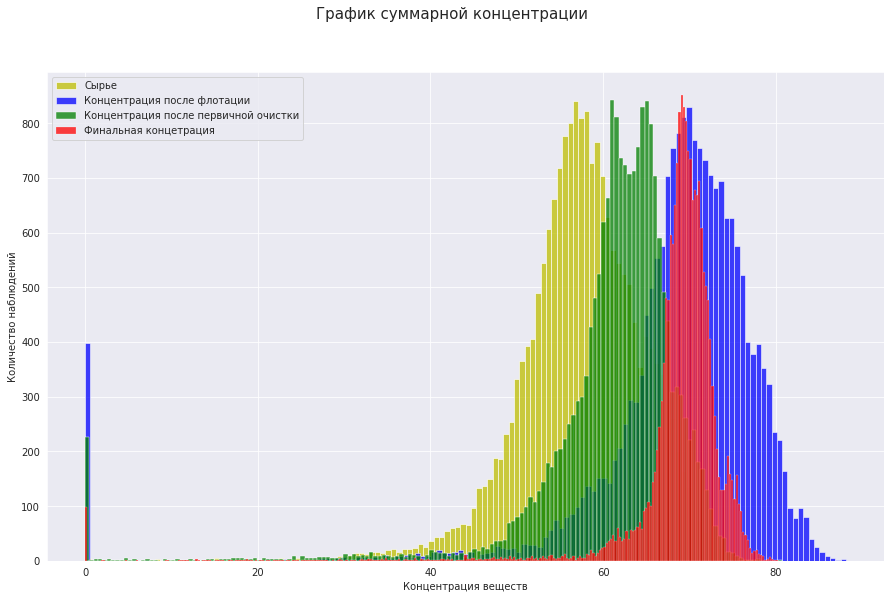

In [50]:
plt.figure(figsize=[15, 9])
plt.suptitle('График суммарной концентрации', fontsize=15)
sns.set_style('darkgrid')
sns.histplot(sum_concentrate_of_rougher_input, color='y', label='Сырье', kde=False)
sns.histplot(sum_concentrate_of_rougher_output, color='b', label='Концентрация после флотации', kde=False)
sns.histplot(sum_concentrate_of_primary_cleaner_output, color='g', label='Концентрация после первичной очистки', kde=False)
sns.histplot(sum_concentrate_of_final_output, color='r', label='Финальная концетрация',kde=False)
plt.xlabel('Концентрация веществ')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show();

Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается.

Для финального и этапа флотации для суммарной концентрации веществ присутствуют аномалии ( значения в районе 0). Исключим их. Аномалии могут негативно повлиять на качество обучения модели.

In [ ]:
data_train = data_train[(data_train['rougher.output.concentrate_au'] != 0)\
                    & (data_train['rougher.output.concentrate_ag'] != 0)\
                    & (data_train['rougher.output.concentrate_pb'] != 0)\
                    & (data_train['rougher.output.concentrate_sol'] != 0)]
data_train = data_train[(data_train['final.output.concentrate_au'] != 0)\
                    & (data_train['final.output.concentrate_ag'] != 0)\
                    & (data_train['final.output.concentrate_pb'] != 0)\
                    & (data_train['final.output.concentrate_sol'] != 0)]

### Вывод по анализу

- Распределения гранул сырья на обучающей и тестовой выборках значительных различий не имеют
- Доля золота увеличивается по мере прохождения этапов очистки
- Исключили анамольные значения в районе 0

## Модель

Исключим отсутствующие в тестовой выборке признаки (за исключением целевых признаков) из тренировочной выборки.

In [ ]:
signs_for_delete_without_target_signs = missed_signs - set(['rougher.output.recovery','final.output.recovery'])
print('Количество признаков для удаления из тренировочной выборки -', len(signs_for_delete_without_target_signs))

In [ ]:
data_train = data_train.drop(columns=signs_for_delete_without_target_signs, axis=1)

Напишем функцию для вычисления sMape

In [ ]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [ ]:
# Создадим датафрейм для сохранения результатов моделей с лучшими параметрами
# Названия столбцов будут соответствовать названиям тестируемых моделей
smape_scorer = make_scorer(get_smape, greater_is_better = False)

Напишем функцию для вычисления итоговой sMAPE.

In [ ]:
def get_final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

Подготовим данные для обучения моделей

In [ ]:
features_for_train_df = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_train_df = data_train['rougher.output.recovery']
target_for_final_on_train_df = data_train['final.output.recovery']

Обучим разные модели и оцените их качество кросс-валидацией.

### Модель LinearRegression

In [ ]:
dct_with_scores = {}

In [ ]:
%%time
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_for_train_df,
                          target_for_rougher_on_train_df,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_for_train_df,
                        target_for_final_on_train_df,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
dct_with_scores['LR'] = [result_smape]
result_smape

Итоговый smape получился 10

### Модель DecisionTreeRegressor

In [ ]:
state = RandomState(12345)

In [ ]:
%%time
best_result_for_dt = 100
best_param_for_dt = 0
for n in range(1, 20, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=state)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_for_train_df,
                              target_for_rougher_on_train_df,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=state)
    smape_final = cross_val_score(model_dt_final, 
                                  features_for_train_df,
                                  target_for_final_on_train_df,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result_for_dt:
        best_result_for_dt = result_smape
        best_param_for_dt = n
dct_with_scores['DT'] = [best_result_for_dt, best_param_for_dt]
print(f'Кол-во деревьев = {best_param_for_dt}, итоговый sMAPE = {best_result_for_dt}')

Кол-во деревьев = 3, итоговый sMAPE = 8.925785452030949  

CPU times: user 1min 21s, sys: 0 ns, total: 1min 21s  
Wall time: 1min 21s

### Модель RandomForestRegressor

In [ ]:
%%time
best_model_for_rf = 100
best_param_for_rf = 0
for n in range(10, 100, 10):
    for d in range(1,10):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_for_train_df,
                                  target_for_rougher_on_train_df,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_final = cross_val_score(model_rf_final,
                                features_for_train_df,
                                target_for_final_on_train_df,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [n,d]
dct_with_scores['RF'] = [best_model_for_rf, best_param_for_rf]
print(f'лучшая модель с параметрами: кол-во деревьев ={best_param_for_rf[1]}, кол-во жюри = {best_param_for_rf[0]}')

лучшая модель с параметрами: кол-во деревьев =4, кол-во жюри = 10  
CPU times: user 1h 42min 15s, sys: 7.21 s, total: 1h 42min 22s  
Wall time: 1h 42min 24s

In [ ]:
for key in dct_with_scores.keys():
    print(f'\модель {str(key).upper()} модель с результатом - {dct_with_scores[key][0]}')

Лучшая модель RandomForestRegressor с параметрами кол-во деревьев =4, кол-во жюри = 10 и sMARE = 8.529258429567625

### Тестовая выборка

Разделим на признаки и целевые признаки

In [ ]:
features_for_test_df = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_test_df = data_test['rougher.output.recovery']
target_for_final_on_test_df = data_test['final.output.recovery']

Применим модель и рассчитаем sMARE

In [ ]:
model_for_test_rougher = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model_for_test_rougher.fit(features_for_train_df, target_for_rougher_on_train_df)
predicted_rougher = model_for_test_rougher.predict(features_for_test_df)

model_for_test_final = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model_for_test_final.fit(features_for_train_df, target_for_final_on_train_df)
predicted_final = model_for_test_final.predict(features_for_test_df)

smape_for_test_rougher = get_smape(target_for_rougher_on_test_df, predicted_rougher)
smape_for_test_final = get_smape(target_for_final_on_test_df, predicted_final)
final_smape_for_test = get_final_smape(smape_for_test_rougher, smape_for_test_final)

In [ ]:
final_smape_for_test

На тестовой выборке sMARE составляет 9.504

### Проверка на адекватность

In [ ]:
dummy_regr_for_rougher = DummyRegressor(strategy="mean")
dummy_regr_for_final = DummyRegressor(strategy="mean")

dummy_regr_for_rougher.fit(features_for_train_df, target_for_rougher_on_train_df)
dummy_regr_for_final.fit(features_for_train_df, target_for_final_on_train_df)

dummy_predicted_rougher = dummy_regr_for_rougher.predict(features_for_test_df)
dummy_predicted_final = dummy_regr_for_final.predict(features_for_test_df)

smape_for_const_rougher = get_smape(target_for_rougher_on_test_df, dummy_predicted_rougher)
smape_for_const_final = get_smape(target_for_final_on_test_df, dummy_predicted_final)

final_smape_for_const = get_final_smape(smape_for_const_rougher, smape_for_const_final)

In [ ]:
final_smape_for_const

Наша модель лучше констанстной на 0,3 у.е. Проверка на адекватность пройдена.

**Промежуточный вывод**:
- протестировали 3 модели кросс-валидацией LinearRegression, DecisionTreeRegressor, RandomForestRegressor
- лучшая модель RandomForestRegressor с параметрами кол-во деревьев =4, кол-во жюри = 10. Итоговый sMARE на тренировочной выборке составляет = 8.529258429567625
- На тестовой выборке итоговый sMARE 9.504033186609172, что меньше констатной модели, а следовательно модель качественная.
- Следует добавить больше признаков для тестовой модели, так как исключили большинство.

## Вывод

Мы изучили промышленный процесс добычи золота. 
- Из 84 признаков выделели только часть для тестирования
- Доля золота на после каждого этапа очистки постепенно увеличивается
- Доля серебра увеличивается на этапе флотации, а затем постепенно уменьшается
- Доля свинца сначала увеличивается на этапе флотации и после первичной очитски, затем остатется примерно на одном уровне
- Для этапа флотации распределение гранул находится примерно в одинаковом диапазоне, но для тренировочной выборки преобладают гранулы с размером ~ 50 , а для тестовой наоборот, ниже порога 50.
- На тестовой выборке итоговый sMARE `9.504033186609172`, что меньше констатной модели